In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Import Dataset
from ucimlrepo import fetch_ucirepo 
  
# dataset from: https://archive.ics.uci.edu/dataset/222/bank+marketing
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

In [6]:
# Combine features and target into one dataframe
df = X.copy()

df["y"] = y.iloc[:, 0]

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [7]:
df["y"] = df["y"].map({"yes": 1, "no": 0})
df["y"].value_counts(dropna=False)

y
0    39922
1     5289
Name: count, dtype: int64

In [9]:
# Only ~12% of clients subscribed to a term deposit. 
# This imbalance reflects real-world marketing outcomes and is important to consider when interpreting patterns or evaluating models.

In [8]:
df.isnull().sum().sort_values(ascending=False).head(20)

poutcome       36959
contact        13020
education       1857
job              288
month              0
previous           0
pdays              0
campaign           0
duration           0
age                0
day_of_week        0
loan               0
housing            0
balance            0
default            0
marital            0
y                  0
dtype: int64

In [11]:
# Visualize Imbalance

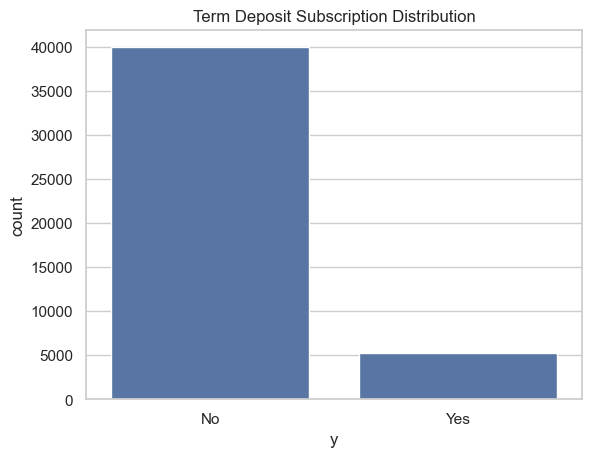

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="y", data=df)
plt.title("Term Deposit Subscription Distribution")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

In [13]:
# Who is more likely to say yes analysis

In [16]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,44923,11,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,43354,3,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,32191,2,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


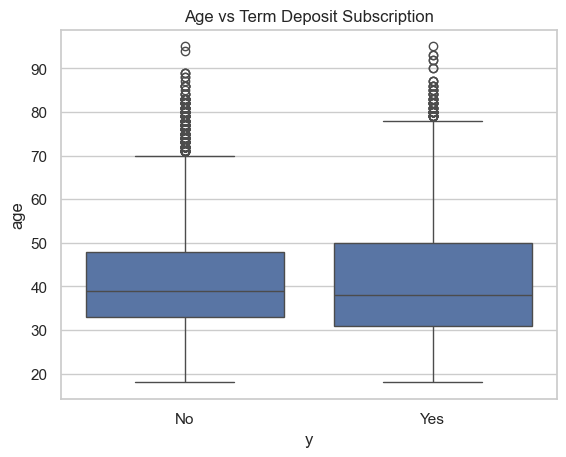

In [17]:
# Comparison by AGE
sns.boxplot(x="y", y="age", data=df)
plt.title("Age vs Term Deposit Subscription")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

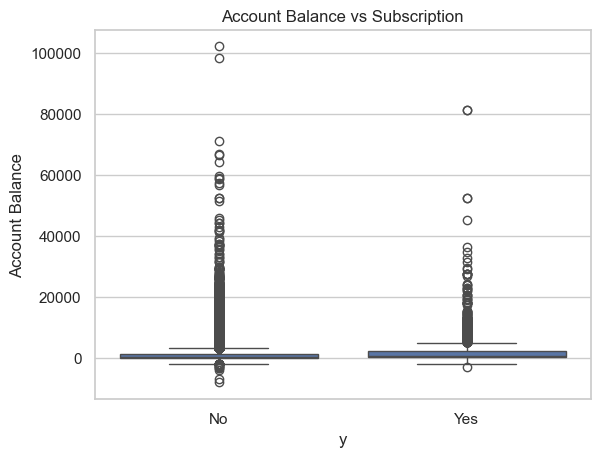

In [18]:
# Comparison by Balance Profile
sns.boxplot(x="y", y="balance", data=df)
plt.title("Account Balance vs Subscription")
plt.xticks([0, 1], ["No", "Yes"])
plt.ylabel("Account Balance")
plt.show()

In [19]:
df.groupby("y")["balance"].median()

y
0    417.0
1    733.0
Name: balance, dtype: float64

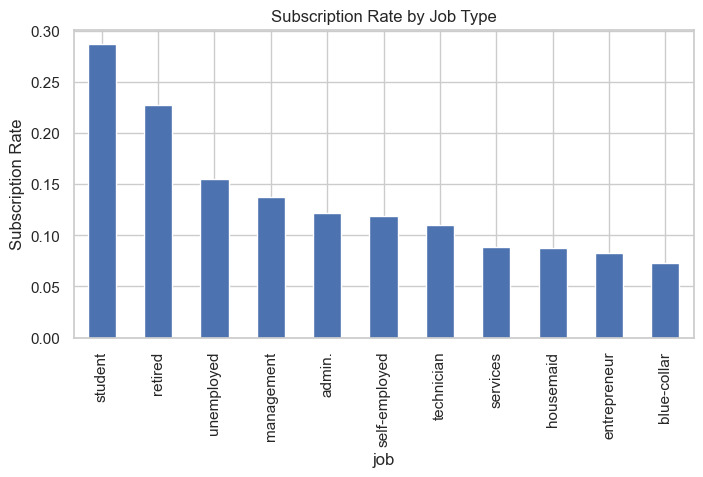

In [20]:
# Comparison by JOB
job_rate = (df
    .groupby("job")["y"]
    .mean()
    .sort_values(ascending=False))

job_rate.plot(kind="bar", figsize=(8,4))
plt.title("Subscription Rate by Job Type")
plt.ylabel("Subscription Rate")
plt.show()

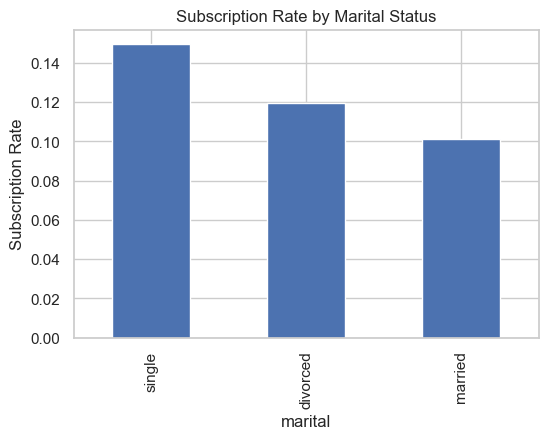

In [21]:
# Compare by Marital Status
marital_rate = (df
    .groupby("marital")["y"]
    .mean()
    .sort_values(ascending=False))

marital_rate.plot(kind="bar", figsize=(6,4))
plt.title("Subscription Rate by Marital Status")
plt.ylabel("Subscription Rate")
plt.show()

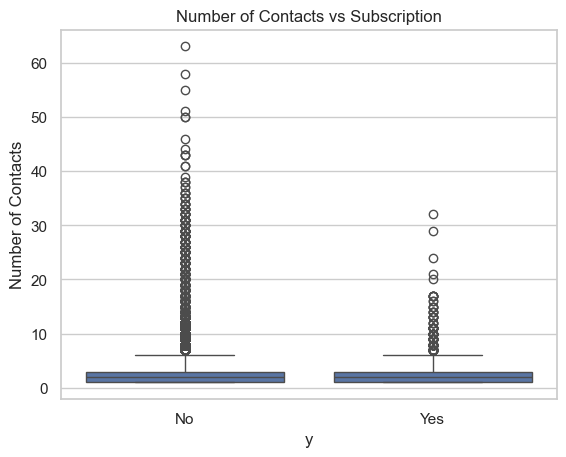

In [22]:
# Compare by Contacts
sns.boxplot(x="y", y="campaign", data=df)
plt.title("Number of Contacts vs Subscription")
plt.xticks([0, 1], ["No", "Yes"])
plt.ylabel("Number of Contacts")
plt.show()

In [23]:
df.groupby("y")["campaign"].median()

y
0    2.0
1    2.0
Name: campaign, dtype: float64

In [24]:
# Customer Profile Summary
#  Subscribers tend to be older
#  Higher median balances are associated with subscription
#  Lack of a job, "student", "retired", "unemployed" show more sucessful subscriptions
#  Fewer contact attempts are associated with successful subscriptions

In [37]:
# Create Modeling
features = ["age", "balance", "campaign", "job", "marital"]
model_df = df[features + ["y"]]

In [38]:
# Variables
model_df = pd.get_dummies(
    model_df,
    columns=["job", "marital"],
    drop_first=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [39]:
# Scalter for Split
numeric_cols = ["age", "balance", "campaign"]

In [40]:
# Train Test
X = model_df.drop("y", axis=1)
y = model_df["y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

In [41]:
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [42]:
# LogReg
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [43]:
# Classification Report
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      9981
           1       0.00      0.00      0.00      1322

    accuracy                           0.88     11303
   macro avg       0.44      0.50      0.47     11303
weighted avg       0.78      0.88      0.83     11303



In [44]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

In [46]:
y_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

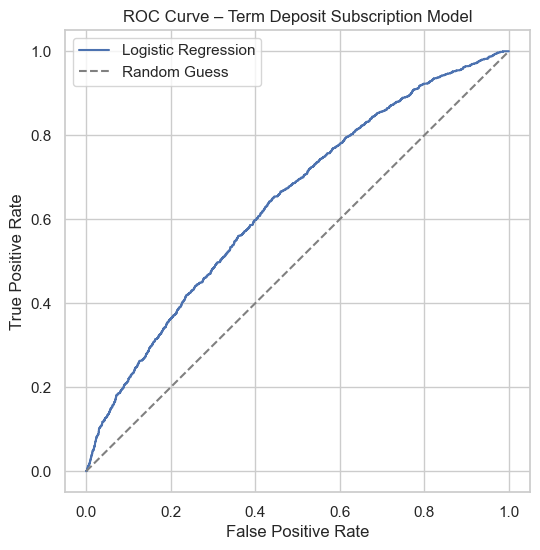

0.6408179322861698

In [48]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Term Deposit Subscription Model")
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
auc_score

In [ ]:
# ROC Analysis
#  The ROC curve demonstrates that the logistic regression model performs better than random guessing across a range of classification thresholds. 
#  While performance is moderate, this is expected given the strong class imbalance and limited feature set. 
#  The AUC score indicates the model has meaningful, though imperfect, discriminatory power.